In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# function to calculate the Dice Similarity Score (DS)
def dice_similarity_score(mask, ground_truth):
    intersection = np.sum(mask & ground_truth)
    union = np.sum(mask) + np.sum(ground_truth)
    ds = 2 * intersection / union
    return ds

# function for plant object segmentation
def segment_plant(image):
    # converting the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # applying thresholding to obtain binary mask
    _, binary_mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # applying morphological operations to clean up the mask
    kernel = np.ones((5, 5), np.uint8)
    cleaned_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)
    
    return cleaned_mask

# function for automated leaf detection and counting
def detect_leaves(image):
    # converting the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # applying thresholding to obtain binary mask
    _, binary_mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # finding contours of leaf objects
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # drawing bounding boxes around the leaves and count them
    leaf_count = len(contours)
    leaf_image = image.copy()
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(leaf_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    return leaf_image, leaf_count

In [3]:
# Load the CSV file containing leaf counts for each image
csv_file_path = 'leaf_counts.csv'
leaf_counts_df = pd.read_csv(csv_file_path)

leaf_counts_df

file  count
0   plant001      7
1   Plant002      7
2   Plant003      8
3   Plant004      8
4   Plant005      8
5   plant006      7
6   Plant007      8
7   Plant008      6
8   Plant009      6
9   Plant010      7
10  Plant011      8
11  Plant012      9
12  Plant013      8
13  Plant014      8
14  Plant015      6
15  Plant016      7

In [4]:
image_names = leaf_counts_df['file']
actual_leaf_counts = leaf_counts_df['count']


# Initialize lists to store results
ds_scores = []
detected_leaf_counts = []

In [5]:
# Loop through all the plant images
for image_name in image_names:
    
    # Loading the plant image and corresponding ground-truth leaf labelled image
    plant_image_path = f'Plant Image Dataset/Plant/{image_name}_rgb.png'
    leaf_image_path = f'Plant Image Dataset/Ground Truth/{image_name}_label.png'
    
    plant_image = cv2.imread(plant_image_path)
    leaf_image = cv2.imread(leaf_image_path)
    
    # task a: Automated plant object segmentation
    segmented_plant_mask = segment_plant(plant_image)
    
    # task b: Segmentation evaluation (DS calculation)
    ground_truth_mask = cv2.cvtColor(leaf_image, cv2.COLOR_BGR2GRAY)
    _, ground_truth_mask = cv2.threshold(ground_truth_mask, 1, 255, cv2.THRESH_BINARY)
    
    ds_score = dice_similarity_score(segmented_plant_mask, ground_truth_mask)
    ds_scores.append(ds_score)
    
    # task c: automated leaf detection and counting
    detected_leaf_image, detected_leaf_count = detect_leaves(plant_image)
    detected_leaf_counts.append(detected_leaf_count)
    
    # Save the results for the first two images
    if image_name == 'plant_002':
        plant_002_original = plant_image
        plant_002_segmented = segmented_plant_mask
        plant_002_ds = ds_score
        plant_002_detected_leaves = detected_leaf_image
        plant_002_detected_leaf_count = detected_leaf_count
    elif image_name == 'plant_005':
        plant_005_original = plant_image
        plant_005_segmented = segmented_plant_mask
        plant_005_ds = ds_score
        plant_005_detected_leaves = detected_leaf_image
        plant_005_detected_leaf_count = detected_leaf_count

In [8]:
# Task 1 - Print results for plant_002 and plant_005
print("Results for plant_002:")
print(f"Original Image:\n{plant_002_original}")
print(f"Segmented Plant Image:\n{plant_002_segmented}")
print(f"Dice Similarity Score (DS): {plant_002_ds}")
print(f"Detected Leaf Image:\n{plant_002_detected_leaves}")
print(f"Detected Leaf Count: {plant_002_detected_leaf_count}")

print("Results for plant_005:")
print(f"Original Image:\n{plant_005_original}")
print(f"Segmented Plant Image:\n{plant_005_segmented}")
print(f"Dice Similarity Score (DS): {plant_005_ds}")
print(f"Detected Leaf Image:\n{plant_005_detected_leaves}")
print(f"Detected Leaf Count: {plant_005_detected_leaf_count}")

Results for plant_002:


NameError: name 'plant_002_original' is not defined

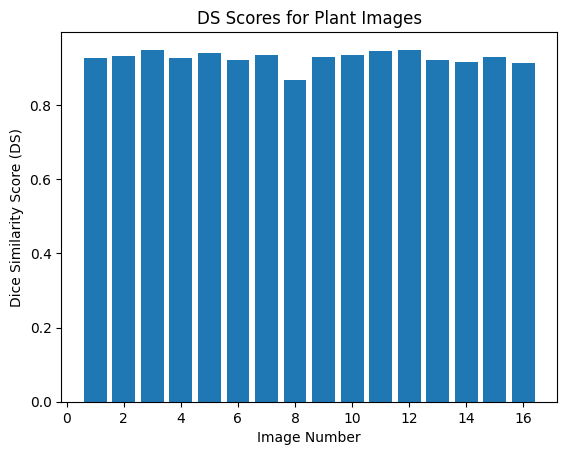

Mean Dice Similarity Score (DS) for all images: 0.927
Mean absolute difference in leaf counts: 3.25


In [9]:
# Task 2 - Bar graph of DS scores for all plant images
plt.bar(range(1, 17), ds_scores)
plt.xlabel('Image Number')
plt.ylabel('Dice Similarity Score (DS)')
plt.title('DS Scores for Plant Images')
plt.show()

# Task 3 - Mean of DS scores for all plant images
mean_ds_score = np.mean(ds_scores)
print("Mean Dice Similarity Score (DS) for all images: %.3f" % (mean_ds_score))

# Task 4 - Leaf detection performance evaluation
abs_diff_leaf_counts = np.abs(np.array(detected_leaf_counts) - np.array(actual_leaf_counts))
mean_diff_leaf_counts = np.mean(abs_diff_leaf_counts)
print(f"Mean absolute difference in leaf counts: {mean_diff_leaf_counts}")

In [ ]:

for image_name in image_names:
    # loading the plant image and corresponding ground-truth leaf labelled image
    plant_image_path = f'Plant Image Dataset/Plant/{image_name}_rgb.png'
    leaf_image_path = f'Plant Image Dataset/Ground Truth/{image_name}_label.png'
    
    plant_image = cv2.imread(plant_image_path)
    leaf_image = cv2.imread(leaf_image_path)
    
    # task c: Automated leaf detection and counting
    detected_leaf_image, _ = detect_leaves(plant_image)
    
    # displaying the detected leaf image and the corresponding leaf labelled image
    cv2.imshow(f"Detected Leaves for {image_name}", detected_leaf_image)
    cv2.imshow(f"Ground Truth for {image_name}", leaf_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

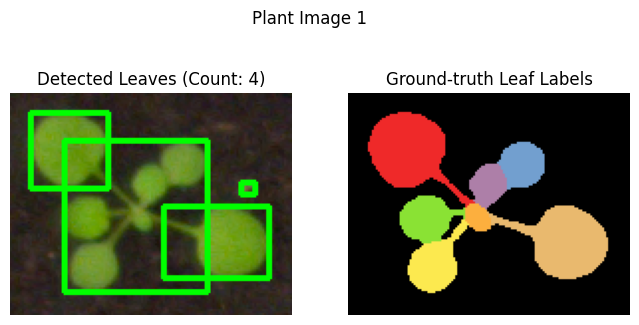

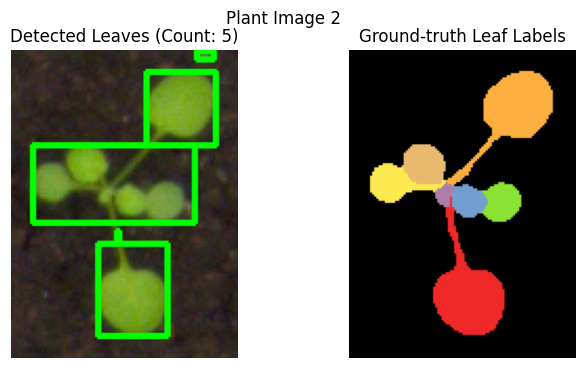

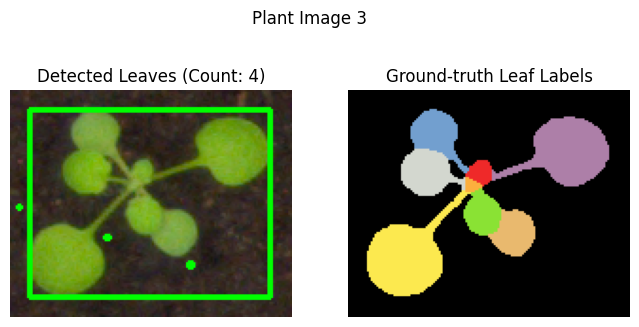

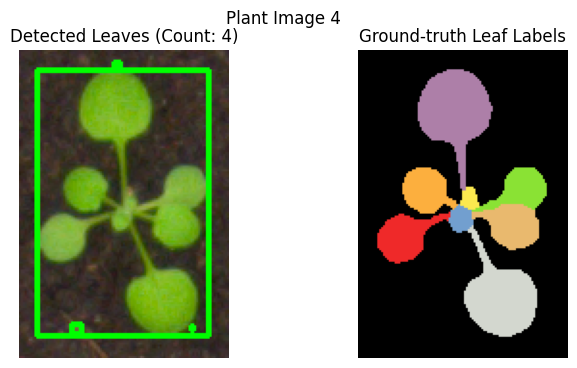

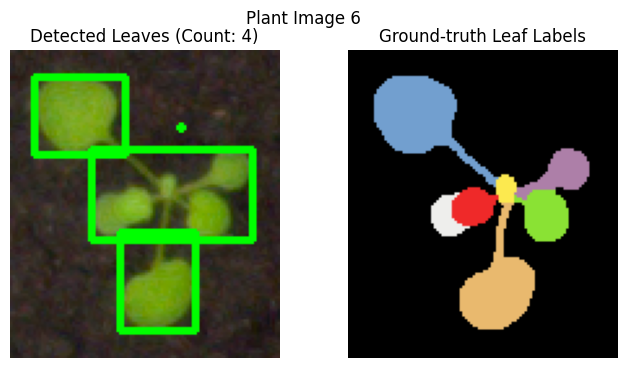

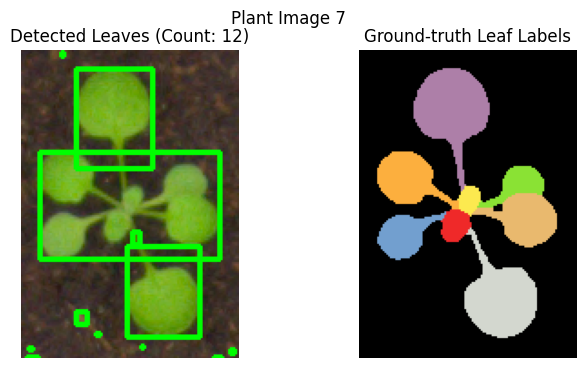

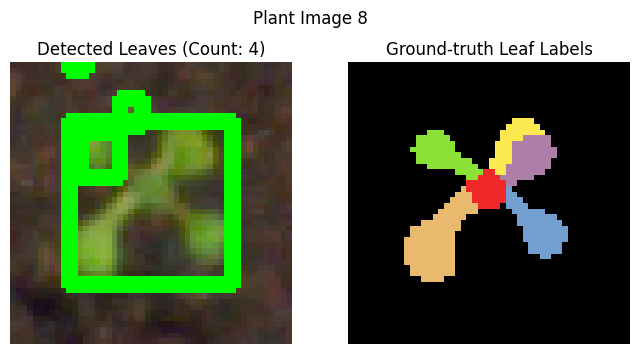

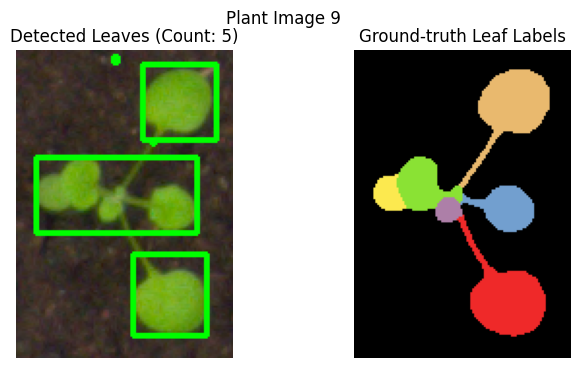

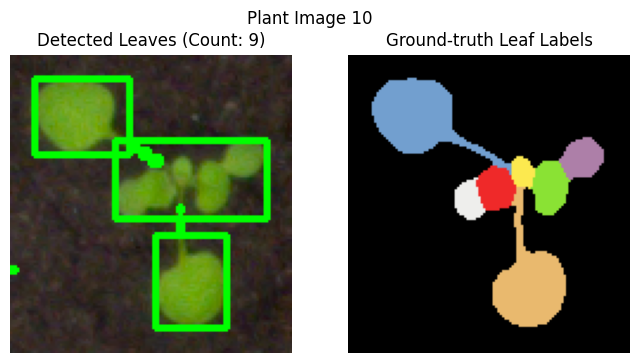

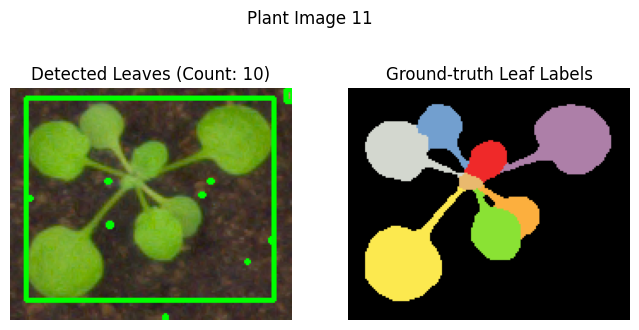

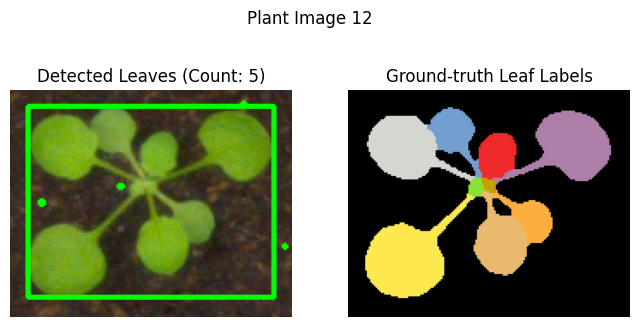

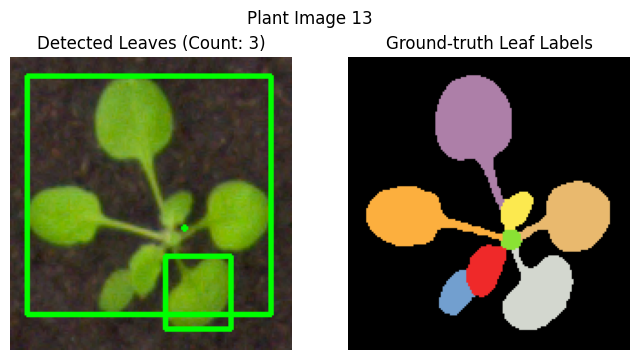

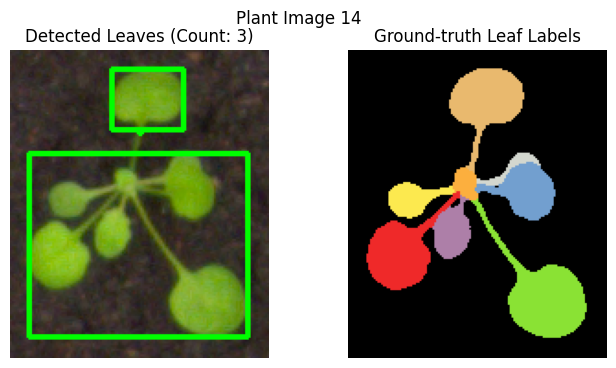

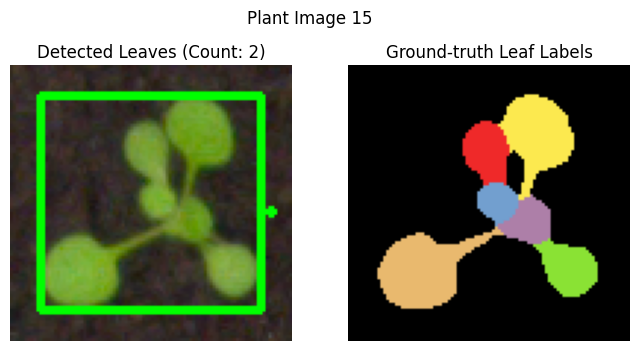

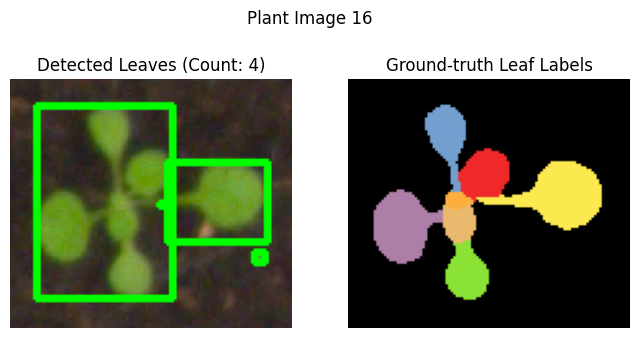

In [10]:
# Task 5 - Appendix (Show detected leaf images for all 15 images along with corresponding leaf labelled images)
for i, image_name in enumerate(image_names):
    # Load the plant image and corresponding ground-truth leaf labelled image
    plant_image_path = f'Plant Image Dataset/Plant/{image_name}_rgb.png'
    leaf_image_path = f'Plant Image Dataset/Ground Truth/{image_name}_label.png'
    
    plant_image = cv2.imread(plant_image_path)
    leaf_image = cv2.imread(leaf_image_path)
    
    # Task c: Automated leaf detection and counting
    detected_leaf_image, detected_leaf_count = detect_leaves(plant_image)
    
    # Plot the detected leaf image and corresponding leaf labelled image
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(detected_leaf_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Detected Leaves (Count: {detected_leaf_count})")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(leaf_image, cv2.COLOR_BGR2RGB))
    plt.title("Ground-truth Leaf Labels")
    plt.axis('off')
    
    plt.suptitle(f"Plant Image {i+1}")
    plt.show()